In [0]:
#run the code 3 times to get 3 different graphs each time 
import pandas as pd
import numpy as np
import pandas
import numpy

data = pd.read_csv('/content/house_data_complete.csv')
#shuffeling data
data=data.sample(frac=1,replace=False)
data=round(data)
y=data['price']
data=data.drop(['id','date','price','waterfront','zipcode','lat','long'],1)

In [0]:
# Plotting library
import os
from matplotlib import pyplot
def plotData(x1,x2, y):
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x1,y, 'ro', ms=10, mec='k')
    pyplot.ylabel('price')
    pyplot.xlabel('bedrooms')

    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x2,y, 'ro', ms=10, mec='k')
    pyplot.ylabel('price')
    pyplot.xlabel('floors')

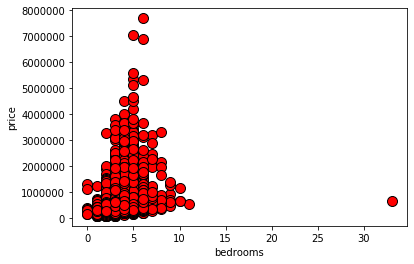

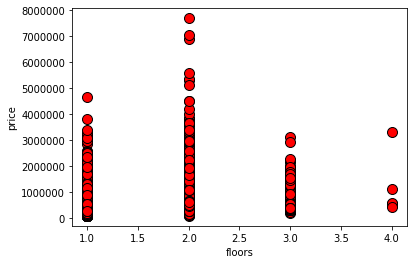

In [232]:
plotData(data['bedrooms'],data['floors'], y)

In [233]:
# Normalization
data_norm = data
mu = np.zeros(data.shape[1])
sigma = np.zeros(data.shape[1])

mu = data.mean()
sigma = data.std()
data_norm =  ( data_norm - mu ) / (sigma)
print('mean', mu)
print('standard div', sigma)
print(data_norm)

mean bedrooms             3.370842
bathrooms            2.058715
sqft_living       2079.899736
sqft_lot         15106.967566
floors               1.534956
view                 0.234303
condition            3.409430
grade                7.656873
sqft_above        1788.390691
sqft_basement      291.509045
yr_built          1971.005136
yr_renovated        84.402258
sqft_living15     1986.552492
sqft_lot15       12768.455652
dtype: float64
standard div bedrooms             0.930062
bathrooms            0.755524
sqft_living        918.440897
sqft_lot         41420.511515
floors               0.554742
view                 0.766318
condition            0.650743
grade                1.175459
sqft_above         828.090978
sqft_basement      442.575043
yr_built            29.373411
yr_renovated       401.679240
sqft_living15      685.391304
sqft_lot15       27304.179631
dtype: float64
       bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
19084  0.676469   1.245871  ...       0.092571   -0.1

In [234]:
#deviding data into Train,corssval and test
num_of_training_samples=int(data_norm.shape[0]*(60/100)) #seting the percentage of the training data
x_training=data_norm[:num_of_training_samples]
y_training=y[:num_of_training_samples]
#print('num_of_training_samples: ',num_of_training_samples)
print(x_training)


num_of_crossvalidation_samples=int(data_norm.shape[0]*(20/100))
x_crossvalidation=data_norm[num_of_training_samples+1:num_of_training_samples+1+num_of_crossvalidation_samples]
y_crossvalidation=y[num_of_training_samples+1:num_of_training_samples+1+num_of_crossvalidation_samples]

#print('num_of_crossvalidation_samples: ',num_of_crossvalidation_samples)
#print(crossvalidation)

num_of_test_samples=int(data_norm.shape[0]*(20/100))
x_test=data_norm[num_of_training_samples+1+num_of_crossvalidation_samples+1:num_of_training_samples+1+num_of_crossvalidation_samples+1+num_of_test_samples]
y_test=y[num_of_training_samples+1+num_of_crossvalidation_samples+1:num_of_training_samples+1+num_of_crossvalidation_samples+1+num_of_test_samples]

#print('num_of_test_samples: ',num_of_test_samples)
#print(test)

       bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
19084  0.676469   1.245871  ...       0.092571   -0.174056
15228 -0.398728  -0.077714  ...       0.457326   -0.171419
652   -0.398728  -1.401298  ...       0.019620   -0.214929
7851  -1.473925  -1.401298  ...      -0.447266   -0.182406
19148  1.751667   5.216624  ...       1.347329    0.176953
...         ...        ...  ...            ...         ...
1578  -0.398728  -1.401298  ...      -1.147596   -0.258842
18887  0.676469  -0.077714  ...       1.347329   -0.284479
10345 -0.398728  -0.077714  ...      -0.067921   -0.206469
20901 -0.398728  -0.077714  ...       0.223883   -0.308980
17882  0.676469  -1.401298  ...       0.369785   -0.109597

[12967 rows x 14 columns]


In [0]:
def computeCostMulti(X, y, lamda, theta):
  
    m = y_training.shape[0] # number of training examples
    J = 0
    
    J=0
    hoftheta = np.dot(X,theta)
    J = (sum((hoftheta-y)**2) / (2*m))+((sum((theta)**2))*(lamda/(2*m)))
    
    return J

In [0]:
def gradientDescentMulti(X, y, theta, alpha, lamda, num_iters):
    # Initialize some useful values
    m = y_training.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hOfTheta=np.dot(X,theta)
        theta=theta-((alpha/m)*((np.dot(X.T,hOfTheta-y))+(lamda*theta)))   
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, lamda, theta))
    
    return theta, J_history


In [0]:
#only run once
m1=x_training.shape[0]
x_training = np.concatenate([np.ones((m1, 1)), x_training], axis=1)

m2=x_crossvalidation.shape[0]
x_crossvalidation = np.concatenate([np.ones((m2, 1)), x_crossvalidation], axis=1)

m3=x_test.shape[0]
x_test = np.concatenate([np.ones((m3, 1)), x_test], axis=1)


In [238]:
lamda_array = np.arange(0.0001,0.1,0.01)
theta_array1=np.zeros((x_training.shape[1]))
theta_array2=np.zeros((x_training.shape[1]))
theta_array3=np.zeros((x_training.shape[1]))

for lamda in lamda_array:
    theta=np.zeros(x_training.shape[1])
    alpha1=0.1
    alpha2=0.001
    alpha3=0.000001
    num_iters=200
    #hyp 1
    theta1, J_history_train1=gradientDescentMulti(x_training, y_training, theta, alpha, lamda, num_iters)
    theta_array1=numpy.concatenate([theta_array1,theta1], axis=0, out=None)

    #hyp 2
    theta2, J_history_train2=gradientDescentMulti(x_training, y_training, theta, alpha2, lamda, num_iters)
    theta_array2=numpy.concatenate([theta_array2,theta2], axis=0, out=None)

    #hyp 3
    theta3, J_history_train3=gradientDescentMulti(x_training, y_training, theta, alpha3, lamda, num_iters)
    theta_array3=numpy.concatenate([theta_array3,theta3], axis=0, out=None)

print(theta_array.shape)


(165,)


In [0]:
#without regularization
def computeCost(X, y, theta):
  
    m = y_training.shape[0] # number of training examples
    J = 0
    
    J=0
    hoftheta = np.dot(X,theta)
    J = (sum((hoftheta-y)**2) / (2*m))
    
    return J

In [240]:
J_history1 = []
J_history2 = []
J_history3 = []
#choosing lamda which gives min eror
len_lamda_array=lamda_array.size
for i in range(len_lamda_array):
    theta1=theta_array1[i*15:((i+1)*15)]
    theta2=theta_array2[i*15:((i+1)*15)]
    theta3=theta_array3[i*15:((i+1)*15)]


    #hyp 1
    J_history1.append(computeCost(x_crossvalidation, y_crossvalidation, theta1))
    #hyp 2
    J_history2.append(computeCost(x_crossvalidation**2, y_crossvalidation, theta2))
    #hyp 3
    J_history3.append(computeCost(x_crossvalidation**3, y_crossvalidation, theta3))


#hyp 1
minErrorIndex1=J_history1.index(min(J_history1))
print(minErrorIndex1)
theta_minError1=theta_array1[minErrorIndex1*15:((minErrorIndex1+1)*15)]
lamda_minError1=lamda_array[minErrorIndex1]
print(J_history1)
print('lamda_minError1',lamda_minError1)
print('min_error1',min_error1)
print('minErrorIndex1',minErrorIndex1)
print('minErrorIndex1',theta_minError1)

#hyp 2

minErrorIndex2=J_history2.index(min(J_history2))
print(minErrorIndex2)
theta_minError2=theta_array2[minErrorIndex2*15:((minErrorIndex2+1)*15)]
lamda_minError2=lamda_array[minErrorIndex2]
print(J_history2)
print('lamda_minError2',lamda_minError2)
print('min_error2',min_error2)
print('minErrorIndex2',minErrorIndex2)
print('theta_minError2',theta_minError2)


#hyp 3
minErrorIndex3=J_history3.index(min(J_history3))
print(minErrorIndex3)
theta_minError3=theta_array3[minErrorIndex3*15:((minErrorIndex3+1)*15)]
lamda_minError3=lamda_array[minErrorIndex3]
print('lamda_minError3',lamda_minError3)
print(J_history3)
print('min_error3',min_error3)
print('minErrorIndex3',minErrorIndex3)
print('theta_minError3',theta_minError3)




1
[72583150932.06505, 8473674605.9952135, 8473674914.459683, 8473675222.997536, 8473675531.608715, 8473675840.293257, 8473676149.05116, 8473676457.882445, 8473676766.787076, 8473677075.764995]
lamda_minError1 0.0101
min_error1 7272134108.684238
minErrorIndex1 1
minErrorIndex1 [ 5.40333160e+05 -4.26963208e+04  3.43935520e+04  7.82296412e+04
  2.47438974e+02  1.40249182e+04  5.40018002e+04  1.68802992e+04
  1.40461219e+05  6.92105319e+04  3.28456950e+04 -9.65241391e+04
  8.58567238e+03  1.68215255e+04 -1.69595147e+04]
1
[72583150932.06505, 24554728341.960945, 24554728846.873238, 24554729351.78594, 24554729856.698925, 24554730361.612328, 24554730866.526043, 24554731371.439884, 24554731876.354298, 24554732381.268772]
lamda_minError2 0.0101
min_error2 7272134108.684238
minErrorIndex2 1
theta_minError2 [97685.42847455 12330.45945694 23998.0742043  33149.92030865
  2894.77129612 10814.73545821 21506.79899238  4698.78110883
 32792.82588308 28462.33673877 15538.24239036 -2450.08652103
  7462.84

In [241]:
#Training

theta=np.zeros(x_training.shape[1])
print(theta.shape)
alpha=0.1
lamda=0.01
num_iters=200
#first hyp
theta1, J_history_train1=gradientDescentMulti(x_training, y_training, theta, alpha, lamda_minError1, num_iters)

#second hyp x^2
theta2, J_history_train2=gradientDescentMulti((x_training)**2, y_training, theta, 0.001, lamda_minError2, num_iters)

#third hyp x^3
theta3, J_history_train3=gradientDescentMulti((x_training)**3, y_training, theta, 0.0000001, lamda_minError3, num_iters)

print('theta1',theta1.shape)


(15,)
theta1 (15,)


Text(0, 0.5, 'Cost J1')

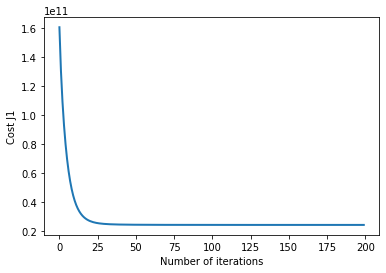

In [242]:
# error versus the iteration
#plotting hypothesis 
pyplot.plot(np.arange(len(J_history_train1)), J_history_train1, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J1')

Text(0, 0.5, 'Cost J2')

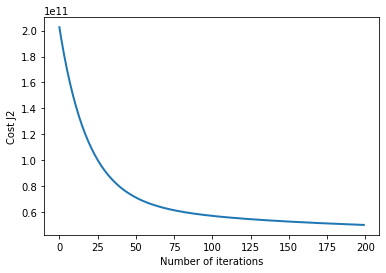

In [243]:
#plotting hypothesis 2
pyplot.plot(np.arange(len(J_history_train2)), J_history_train2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J2')

Text(0, 0.5, 'Cost J3')

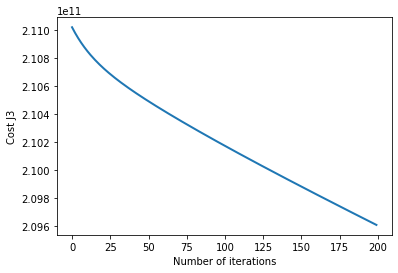

In [244]:
#plotting hypothesis 3
pyplot.plot(np.arange(len(J_history_train3)), J_history_train3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J3')

In [245]:
#testing
h1=np.dot(x_test,theta_minError1)
h2=np.dot(x_test**2,theta_minError2)
h3=np.dot(x_test**3,theta_minError3)
print('predicted1',h)
print('predicted2',h2)
print('predicted3',h3)
#hyp 1
testError1=computeCostMulti(x_test, y_test, lamda_minError1, theta_minError1)
print('testError1',testError1)
#hyp 2
testError2=computeCostMulti(x_test**2, y_test, lamda_minError2, theta_minError2)
print('testError2',testError2)
#hyp 3
testError3=computeCostMulti(x_test**3, y_test, lamda_minError3, theta_minError3)
print('testError3',testError3)

predicted1 [127196.27931505 125152.67865451 151037.33564079 ... 261548.33666589
 161519.11697964 451736.32515394]
predicted2 [ 122551.5304346   148550.84687851  213589.88480364 ... 3865921.22354146
  972095.0918088   133350.58056219]
predicted3 [  110.22967858   127.62961803   -65.26739845 ... 26670.50081549
  3368.49276492    92.22857094]
testError1 8031150839.688412
testError2 28420032279.0223
testError3 71334760009.20616
